In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

C:\Users\Neel vankar\AppData\Local\Temp\ipykernel_24980\775865190.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## check null values and duplicated values

In [6]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
books.duplicated().sum()

0

In [10]:
ratings.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

## EDA

In [12]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [13]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


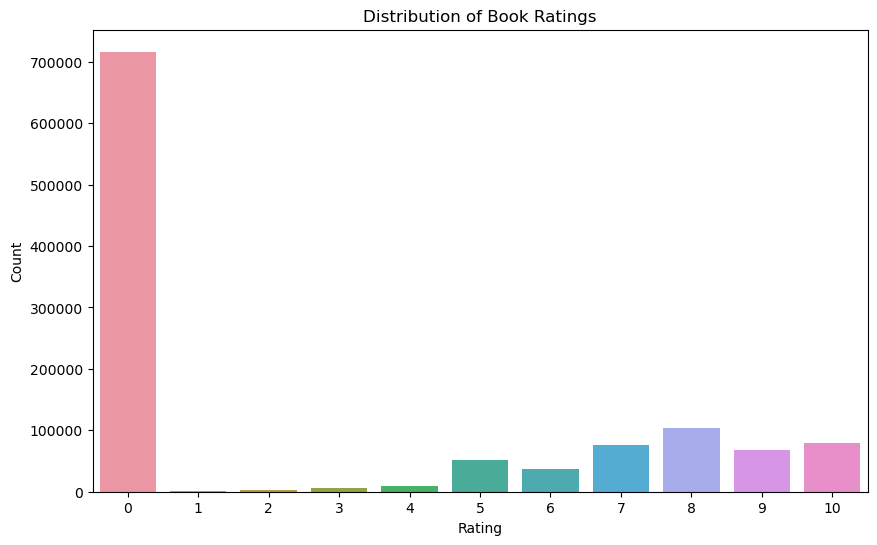

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Popularity based recommendation system

In [14]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [15]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [16]:
ratings_with_name.describe()

,User-ID,Book-Rating
count,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00
std,8.052466e+04,3.854157e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


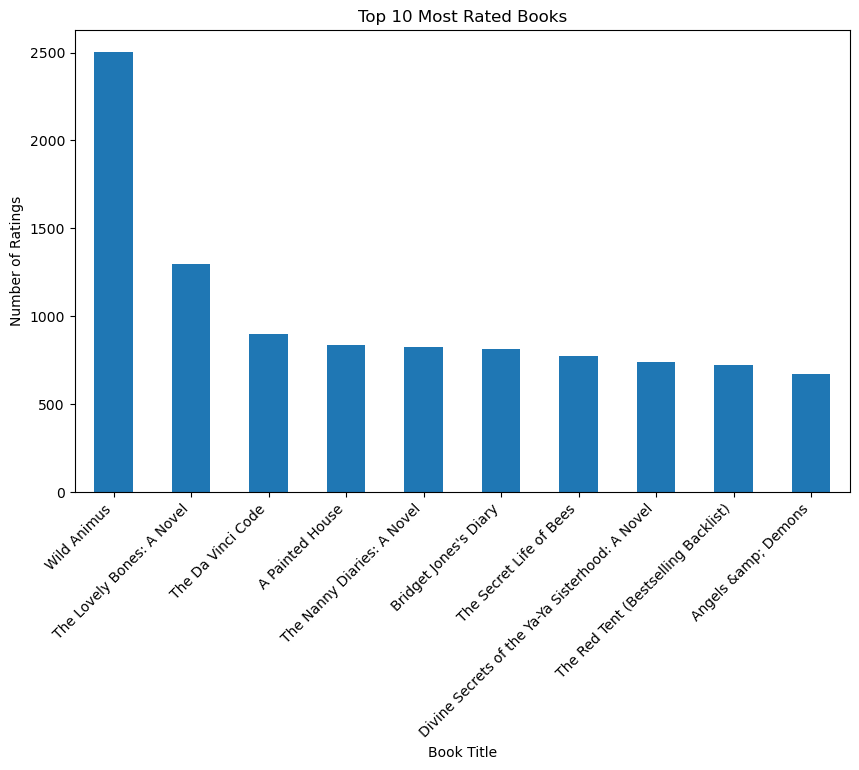

In [19]:
top_rated_books = ratings_with_name['Book-Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_rated_books.plot(kind='bar')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

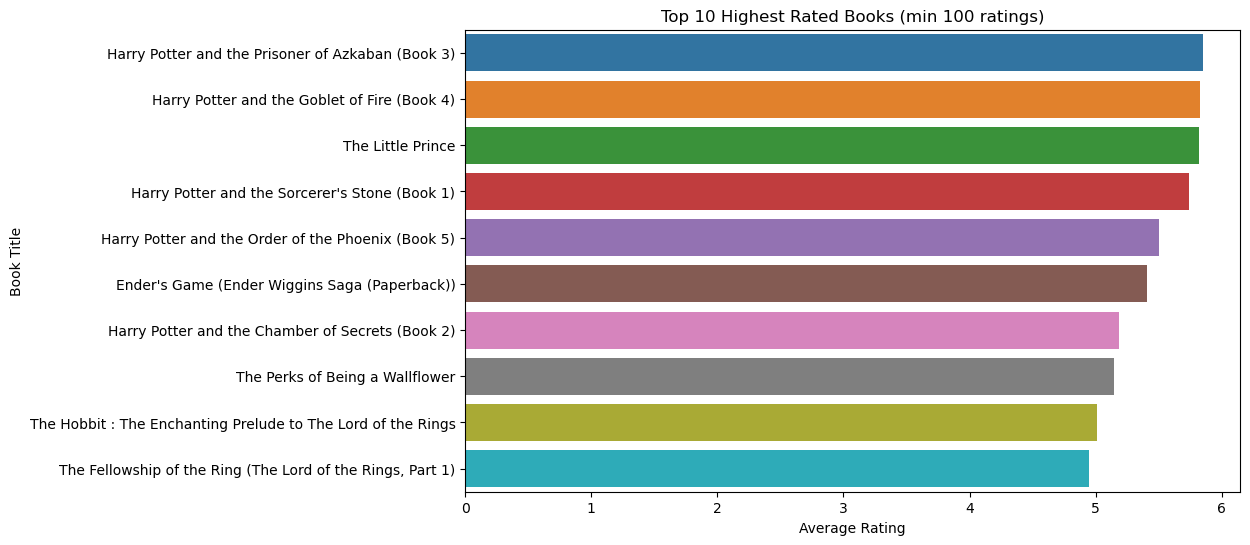

In [21]:
avg_ratings = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean()
num_ratings = ratings_with_name.groupby('Book-Title')['Book-Rating'].count()
book_stats = pd.DataFrame({'Average Rating': avg_ratings, 'Number of Ratings': num_ratings})
top_rated = book_stats[book_stats['Number of Ratings'] >= 100].sort_values('Average Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y=top_rated.index, data=top_rated)
plt.title('Top 10 Highest Rated Books (min 100 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

C:\Users\Neel vankar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Unable to parse string "DK Publishing Inc" at position 209538

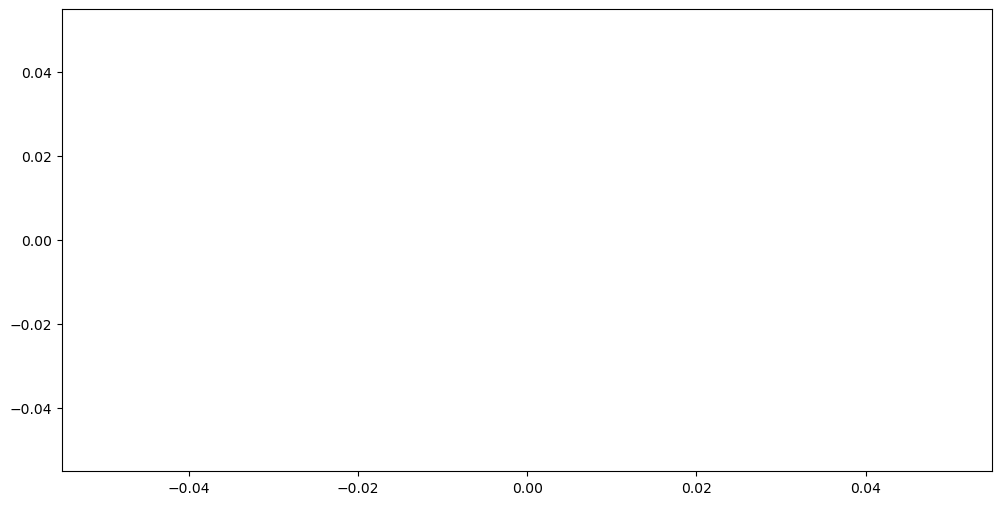

In [26]:
# Visualization 4: Distribution of Publication Years
plt.figure(figsize=(12, 6))
sns.histplot(books['Year-Of-Publication'], bins=50)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.xlim(1950, 2020)  # Limit to reasonable years
plt.show()

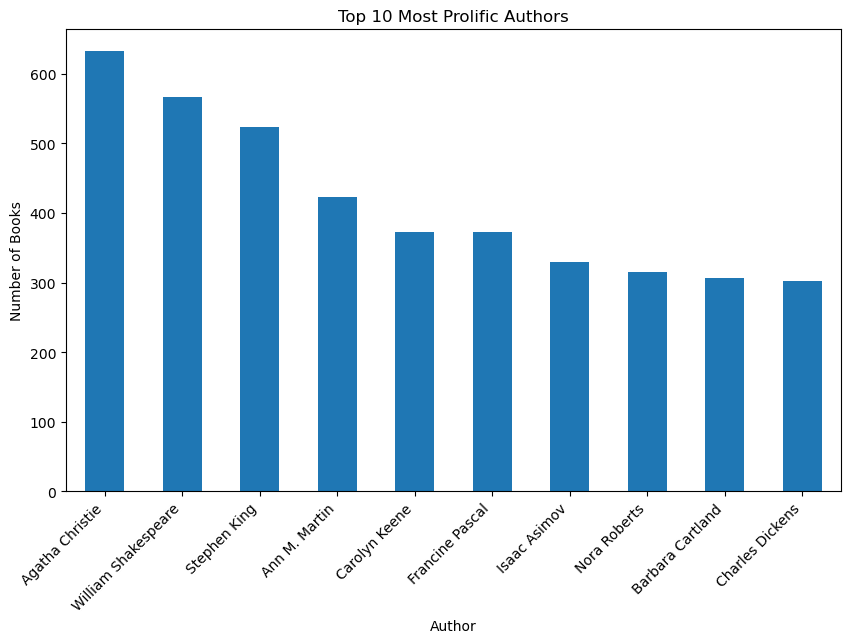

In [24]:
# Visualization 5: Top 10 Most Prolific Authors
top_authors = books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Neel vankar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


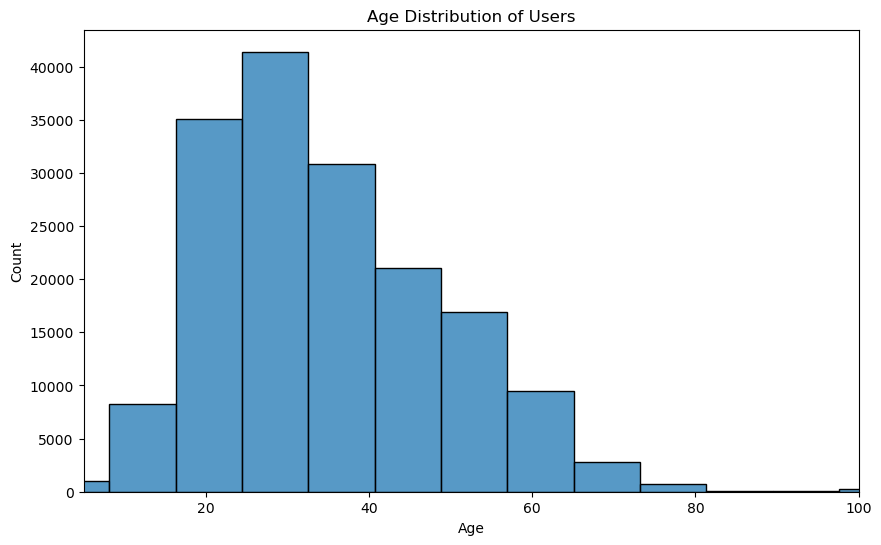

In [27]:
# Visualization 6: Age Distribution of Users
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'].dropna(), bins=30)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(5, 100)  # Remove outliers
plt.show()

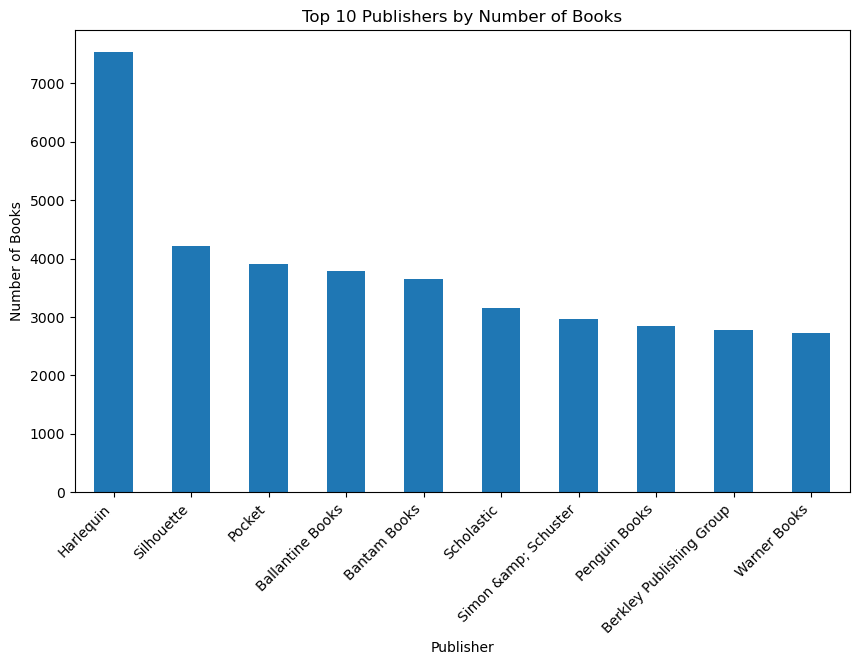

In [28]:
# Visualization 7: Top Publishers
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()

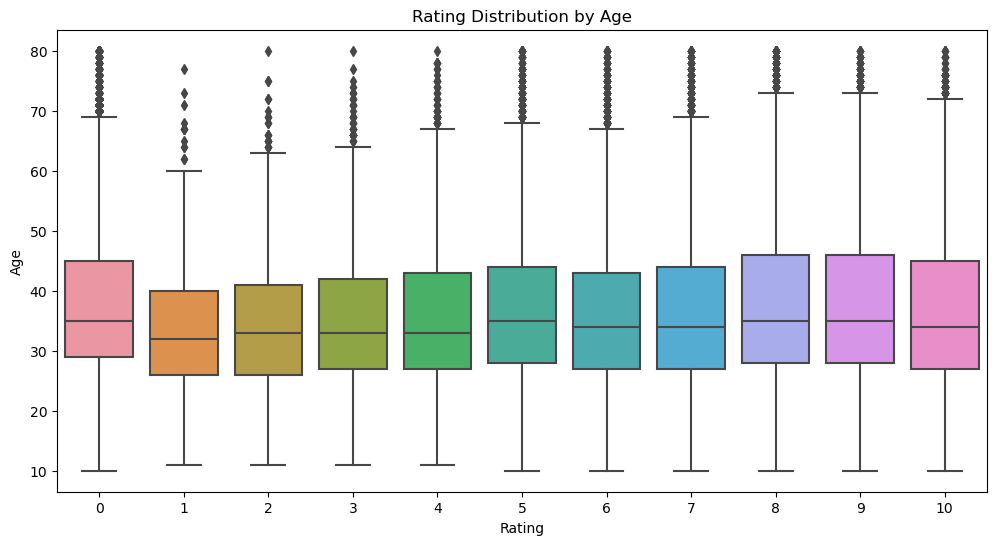

In [29]:
# Visualization 8: Rating Distribution by Age
merged_data = ratings.merge(users, on='User-ID')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Book-Rating', y='Age', data=merged_data[merged_data['Age'].between(10, 80)])
plt.title('Rating Distribution by Age')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

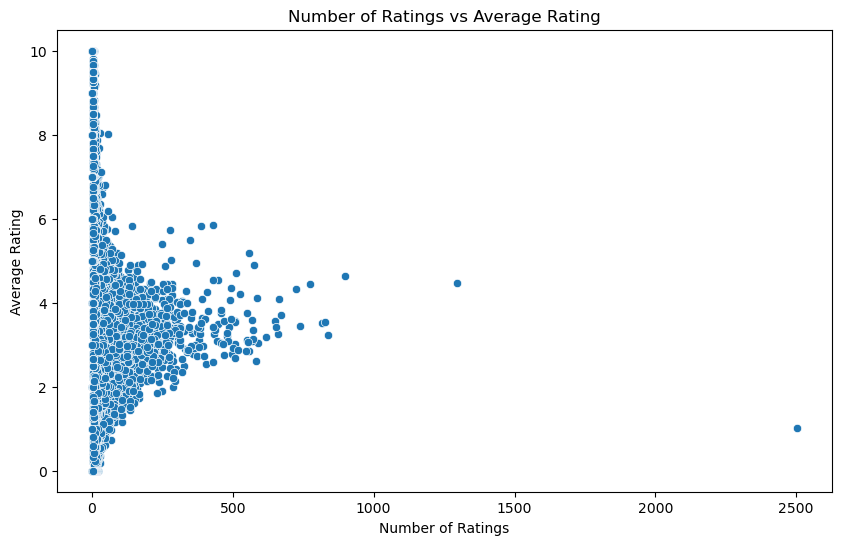

In [30]:
# Visualization 9: Correlation between number of ratings and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Ratings', y='Average Rating', data=book_stats)
plt.title('Number of Ratings vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

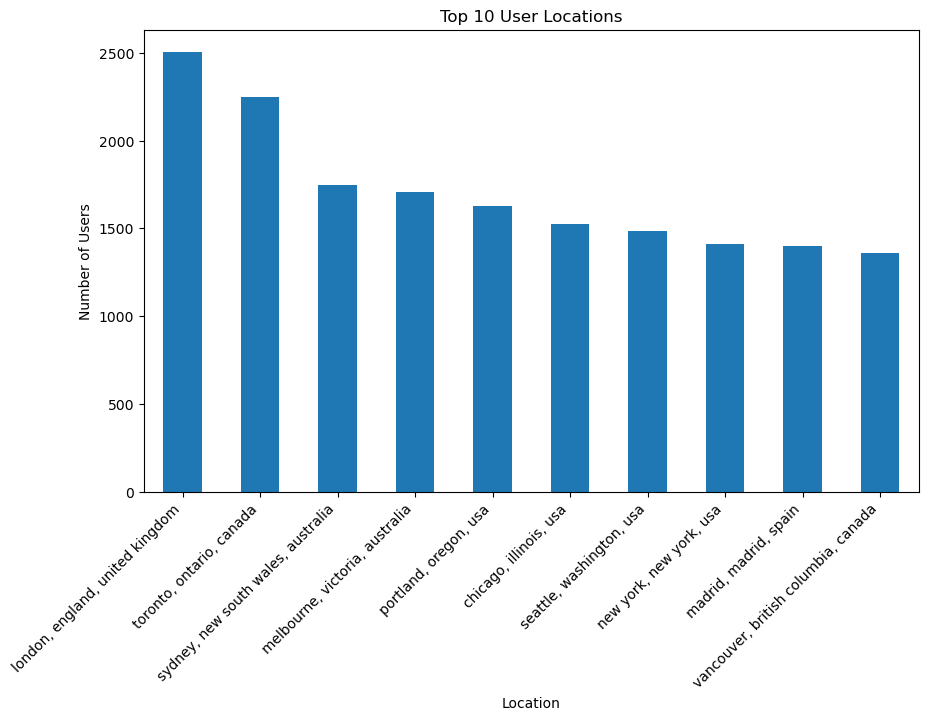

In [31]:
# Visualization 10: Top Locations of Users
top_locations = users['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 User Locations')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
num_ratings=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()


In [18]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [19]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [20]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [21]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')

In [22]:
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [23]:
popular_df=popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False).head(100)

In [24]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','num_ratings','avg_rating']]

In [25]:
popular_df.columns

Index(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Image-URL-M',
       'num_ratings', 'avg_rating'],
      dtype='object')

In [27]:
popular_df.head()

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,The Little Prince,Antoine de Saint-ExupÃ©ry,1968,http://images.amazon.com/images/P/0156528207.0...,141,5.815603
10,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
14,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441


## 2) Collaborative filtering based recommendation system

In [27]:
## A user should rate around 200 books and a book should have 50 votes

In [28]:
# 92106 users have rated at least one book
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200

In [29]:
rated_user=x[x].index

In [30]:
filtered_user=ratings_with_name[ratings_with_name['User-ID'].isin(rated_user)]

In [31]:
y=filtered_user.groupby('Book-Title').count()['Book-Rating']>=50

In [32]:
famous_books=y[y].index

In [33]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [34]:
filtered_user=filtered_user[filtered_user['Book-Title'].isin(famous_books)]

In [35]:
filtered_user.duplicated().sum()

0

In [36]:
pt=filtered_user.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [38]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pt.fillna(0,inplace=True)

In [41]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity_score=cosine_similarity(pt)

In [44]:
cosine_similarity(pt).shape

(706, 706)

In [45]:
similarity_score[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [46]:
def recommend(book_name):
    indexe=np.where(pt.index==book_name)[0][0]
    similar_books=sorted(list(enumerate(similarity_score[indexe])),key=lambda x:x[1],reverse=True)[1:11]
    data=[]
    for i in similar_books:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list((temp_df.drop_duplicates('Book-Title')['Book-Title'].values)))
        item.extend(list((temp_df.drop_duplicates('Book-Title')['Book-Author'].values)))
        item.extend(list((temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values)))
        data.append(item)
    return data

In [47]:
recommend('The Da Vinci Code')


[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg'],
 ['The Lovely Bones: A Novel',
  'Alice Sebold',
  'http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg'],
 ['Timeline',
  'MICHAEL CRICHTON',
  'http://images.amazon.com/images/P/0345417623.01.MZZZZZZZ.jpg'],
 ['The Blue Nowhere : A Novel',
  'Jeffery Deaver',
  'http://images.amazon.com/images/P/0671042262.01.MZZZZZZZ.jpg'],
 ['Sea Glass: A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316089699.01.MZZZZZZ

In [46]:
# sort books based on similarity score
similar_books=sorted(list(enumerate(similarity_score[0])),key=lambda x:x[1],reverse=True)[1:11]

In [48]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [49]:
from sklearn.metrics import root_mean_squared_error

In [50]:

from sklearn.model_selection import train_test_split


# Merge ratings and books
ratings_with_name = ratings.merge(books, on='ISBN')

# Split data into train and test sets
train, test = train_test_split(ratings_with_name, test_size=0.2, random_state=42)

# Get top-N popular books (from training data)
top_n = 10
popular_books = train.groupby('Book-Title')['Book-Rating'].count().reset_index()
popular_books = popular_books.sort_values('Book-Rating', ascending=False).head(top_n)

# Generate recommendations (all users get the same top-N books)
recommendations = popular_books['Book-Title'].tolist()

# Evaluate Precision@K and Recall@K
def evaluate_popularity(test_data, recommendations, k=5):
    hits = 0
    total_relevant = 0
    
    for user_id in test_data['User-ID'].unique():
        user_books = test_data[test_data['User-ID'] == user_id]['Book-Title'].tolist()
        relevant_books = set(user_books)
        recommended_books = set(recommendations[:k])
        
        hits += len(relevant_books & recommended_books)
        total_relevant += len(relevant_books)
    
    precision = hits / (len(test_data['User-ID'].unique()) * k)
    recall = hits / total_relevant if total_relevant > 0 else 0
    
    return precision, recall

precision, recall = evaluate_popularity(test, recommendations, k=5)
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")




Precision@5: 0.0069
Recall@5: 0.0062


In [51]:
from sklearn.metrics import mean_squared_error

# Assuming 'pt' is the pivot table (user-book ratings matrix)
# and 'similarity_score' is the cosine similarity matrix

def evaluate_collaborative_filtering(test_data, pt, similarity_score, k=5):
    test_users = test_data['User-ID'].unique()
    rmse_list = []
    precision_list = []
    recall_list = []
    
    for user_id in test_users[:1000]:  # Limit to 1000 users for speed
        try:
            # Get user's rated books from test data
            user_books = test_data[test_data['User-ID'] == user_id]
            true_ratings = user_books['Book-Rating'].values
            
            # Generate recommendations
            user_idx = np.where(pt.index == user_id)[0][0]
            similar_users = np.argsort(similarity_score[user_idx])[::-1][1:k+1]
            
            # Predict ratings (average of similar users' ratings)
            pred_ratings = []
            for book in user_books['Book-Title']:
                book_idx = np.where(pt.columns == book)[0][0]
                similar_ratings = pt.iloc[similar_users, book_idx].mean()
                pred_ratings.append(similar_ratings)
            
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))
            rmse_list.append(rmse)
            
            # Calculate Precision@K and Recall@K
            recommended_books = pt.columns[np.argsort(pt.iloc[user_idx])[::-1][:k]]
            relevant_books = user_books[user_books['Book-Rating'] >= 5]['Book-Title'].tolist()
            
            hits = len(set(recommended_books) & set(relevant_books))
            precision = hits / k
            recall = hits / len(relevant_books) if len(relevant_books) > 0 else 0
            
            precision_list.append(precision)
            recall_list.append(recall)
            
        except:
            continue
    
    avg_rmse = np.mean(rmse_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    
    return avg_rmse, avg_precision, avg_recall

rmse, precision, recall = evaluate_collaborative_filtering(test, pt, similarity_score, k=5)
print(f"RMSE: {rmse:.4f}")
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")

RMSE: nan
Precision@5: nan
Recall@5: nan


C:\Users\Neel vankar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Neel vankar\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [52]:
def calculate_coverage(pt, similarity_score, k=5):
    all_books = pt.columns
    recommended_books = set()
    
    for user_idx in range(len(pt.index)):
        similar_users = np.argsort(similarity_score[user_idx])[::-1][1:k+1]
        for book_idx in range(len(all_books)):
            if pt.iloc[similar_users, book_idx].mean() > 0:
                recommended_books.add(all_books[book_idx])
    
    coverage = len(recommended_books) / len(all_books)
    return coverage

coverage = calculate_coverage(pt, similarity_score, k=5)
print(f"Coverage: {coverage:.2%}")

Coverage: 94.94%


In [36]:
import pickle as pkl


## Exporting popularity recommendation system

In [56]:
pkl.dump(popular_df,open('popular.pkl','wb'))

## exporting collaborative filtering 

In [57]:
pkl.dump(obj=pt,file=open('pt.pkl','wb'))
pkl.dump(obj=books,file=open('books.pkl','wb'))
pkl.dump(obj=similarity_score,file=open('similarity.pkl','wb'))